In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

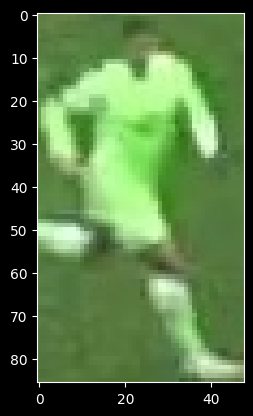

In [3]:
plt.imshow(image)
0904648928plt.show()

# take the top half of the image


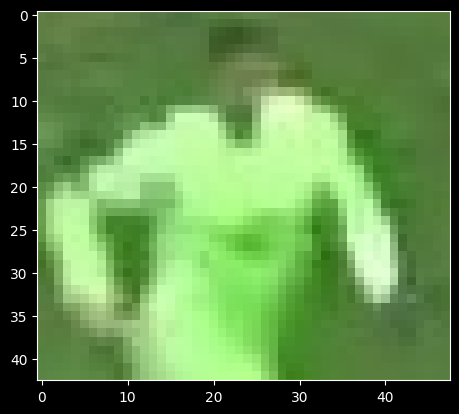

In [4]:
top_half_image= image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)



# cluster the image into two clusters

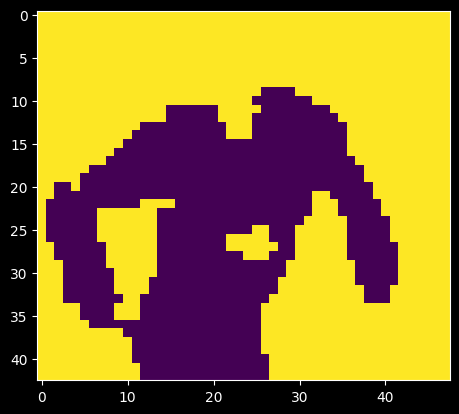

In [9]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()


In [10]:
corner_clusters = [clustered_image[0,0], clustered_image[0,1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])